In [1]:
import numpy as np
import pandas as pd

import re

import pickle

import importlib

import russia_df_utils
importlib.reload(russia_df_utils)
from russia_df_utils import get_uncategorized_df_rows, get_data

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['lines.linewidth'] = 3.0
mpl.rcParams['legend.fontsize'] = 17
pd.set_option('display.max_colwidth', -1)


In [3]:
russia_df = get_data()


In [4]:
russia_df.reset_index(inplace=True)
russia_df.set_index('created_datetime',drop=False, inplace=True)

In [5]:
busiest_window_start = '2016-6-1'
busiest_window_end = '2017-7-1'

hourly_window_start = '2016-10-6'
hourly_window_end = '2016-10-7'

election_day_start = '2016-11-8'
election_day_end = '2016-11-9'

In [6]:
def get_tweets_in_busiest_window(df):
    return df.loc[busiest_window_start:busiest_window_end]

def generate_time_window_counts(df):
    monthly_tweets = df.resample('M')
    counts_per_month = monthly_tweets['id'].count()
    
    busiest_window = get_tweets_in_busiest_window(df)
    daily_tweets = busiest_window.resample('D')
    counts_per_day = daily_tweets['id'].count()
    
    busy_month_sample = df.loc[hourly_window_start:hourly_window_end]
    hourly_tweets = busy_month_sample.resample('H')
    counts_per_hour = hourly_tweets['id'].count()
    return [counts_per_month, counts_per_day, counts_per_hour]

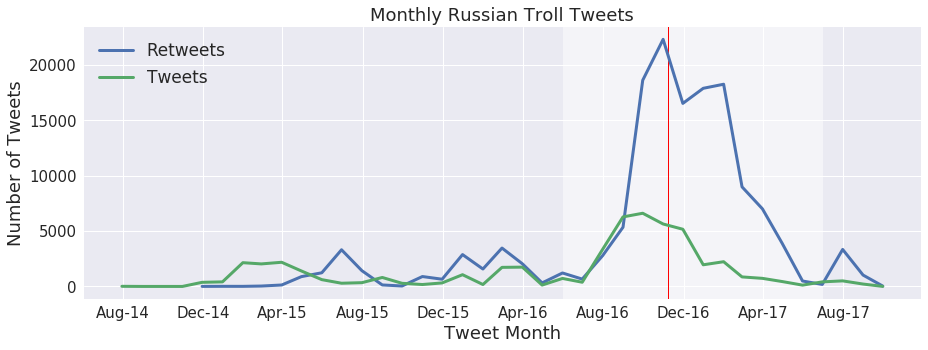

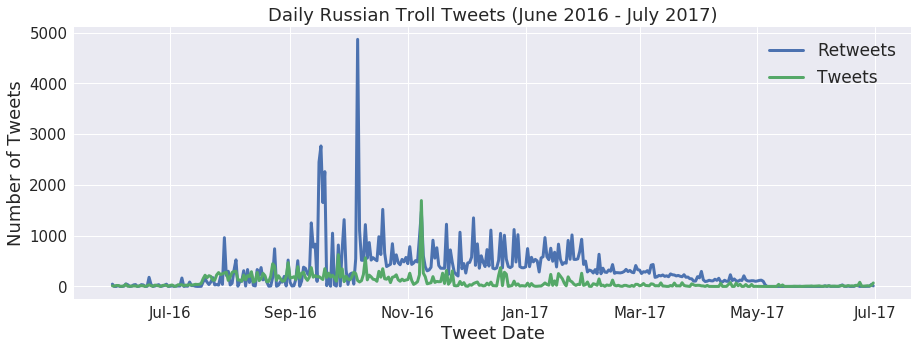

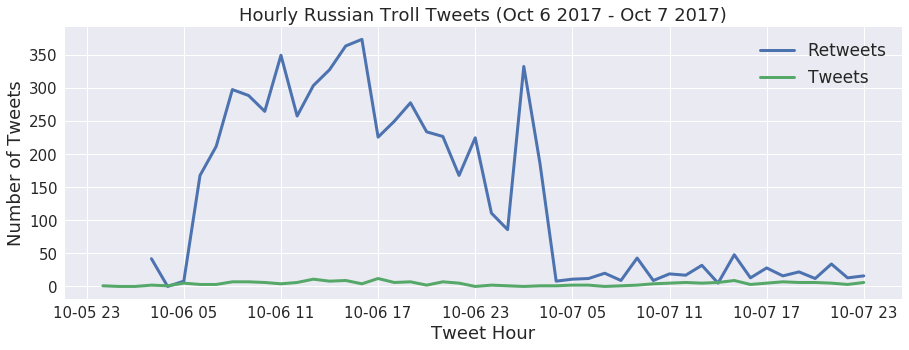

In [7]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%b-%y')

retweets = generate_time_window_counts(russia_df[russia_df['is_rt'] == True])
tweets = generate_time_window_counts(russia_df[russia_df['is_rt'] == False])

fig = plt.figure(figsize=(15,5), facecolor='white')

plt.plot(retweets[0])
plt.plot(tweets[0])
fig.axes[0].xaxis.set_major_formatter(myFmt)

plt.axvspan(busiest_window_start, busiest_window_end, facecolor='white', alpha=0.5)
plt.axvspan(election_day_start, election_day_end, facecolor='red', alpha=1)

plt.xlabel('Tweet Month')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Monthly Russian Troll Tweets')

fig = plt.figure(figsize=(15,5), facecolor='white')
plt.plot(retweets[1])
plt.plot(tweets[1])
fig.axes[0].xaxis.set_major_formatter(myFmt)
#plt.axvspan(hourly_window_start, hourly_window_end, facecolor='red', alpha=0.5)
plt.xlabel('Tweet Date')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Daily Russian Troll Tweets (June 2016 - July 2017)');

plt.figure(figsize=(15,5), facecolor='white')
plt.plot(retweets[2])
plt.plot(tweets[2])
plt.xlabel('Tweet Hour')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Hourly Russian Troll Tweets (Oct 6 2017 - Oct 7 2017)');

In [8]:
busiest_tweets = get_tweets_in_busiest_window(russia_df[russia_df['is_rt'] == True])

busiest_tweets.head(5)

,id,user_id,user_key,retweet_count,retweeted,favorite_count,text,tweet_id,source,expanded_urls,retweeted_status_id,in_reply_to_status_id,created_datetime,processed_text,@midnight,merkel,is_rt
created_datetime,,,,,,,,,,,,,,,,,
2017-02-22 07:43:43,3ca0ddfb-fb8d-453e-a0f9-7c58ba36ae14,1.710805e+09,cookncooks,NaN,NaN,NaN,RT @ltapoll: Who was/is the best president of the past 25 years? (Vote &amp; Retweet),8.343832e+17,NaN,[],NaN,NaN,2017-02-22 07:43:43,@ltapoll: Who was/is the best president of the past 25 years? (Vote & Retweet),False,False,True
2016-12-26 10:06:41,955a8bb6-475b-45e4-ad04-ede11e56f41e,2.584153e+09,queenofthewo,NaN,NaN,NaN,RT @jww372: I don't have to guess your religion! #ChristmasAftermath,8.134006e+17,NaN,[],NaN,NaN,2016-12-26 10:06:41,@jww372: I don't have to guess your religion! #ChristmasAftermath,False,False,True
2017-03-07 13:11:44,b77ae8a1-38e2-4364-998e-b17d4c4e14e2,1.658421e+09,baobaeham,NaN,NaN,NaN,RT @MDBlanchfield: You’ll never guess who tweeted something false that he saw on TV - The Washington Post https://t.co/K2e4XdXRfu,8.391768e+17,NaN,[],NaN,NaN,2017-03-07 13:11:44,@MDBlanchfield: You’ll never guess who tweeted something false that he saw on TV - The Washington Post,False,False,True
2016-12-30 07:49:30,6a13675e-5df9-4592-9ae9-3712b6f0a29b,2.587101e+09,judelambertusa,NaN,NaN,NaN,RT @100PercFEDUP: New post: WATCH: DIAMOND AND SILK Rip On John Kerry Over Israel Comments (VIDEO) https://t.co/NkdKaQ9yYu,8.148157e+17,NaN,[],NaN,NaN,2016-12-30 07:49:30,@100PercFEDUP: New post: WATCH: DIAMOND AND SILK Rip On John Kerry Over Israel Comments (VIDEO),False,False,True
2016-10-29 20:48:19,78b39b0b-c2f7-42ea-8e33-614da47dee89,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https://t.co/JjlZxaW3JN https://t.co/qW2Ok9ROxH,7.925436e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","[""http://www.Feed24hNews.com/4MzaL""]",7.925391e+17,NaN,2016-10-29 20:48:19,@AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of @realDonaldTrump Signs,False,False,True


In [9]:
busiest_tweets[(busiest_tweets['user_key'] == 'ameliebaldwin')]

,id,user_id,user_key,retweet_count,retweeted,favorite_count,text,tweet_id,source,expanded_urls,retweeted_status_id,in_reply_to_status_id,created_datetime,processed_text,@midnight,merkel,is_rt
created_datetime,,,,,,,,,,,,,,,,,
2016-10-29 20:48:19,78b39b0b-c2f7-42ea-8e33-614da47dee89,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of Trump Signs https://t.co/JjlZxaW3JN https://t.co/qW2Ok9ROxH,7.925436e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","[""http://www.Feed24hNews.com/4MzaL""]",7.925391e+17,NaN,2016-10-29 20:48:19,@AriaWilsonGOP: 3 Women Face Charges After Being Caught Stealing Dozens Of @realDonaldTrump Signs,False,False,True
2016-09-09 04:11:25,33062571-04cc-4d0d-87b5-a7fcd2e8b2fd,1.679279e+09,ameliebaldwin,0.0,False,0.0,"RT @Gumball55668882: DEMOCRATS,,WOMEN ,,BILL CLINTON HAS ABUSED \nMANY WOMEN ,, ONLY TO BE PROTECTED BY HILLARY ,ATTACKING THOSE VICTIMS ht…",7.741734e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",[],7.740530e+17,NaN,2016-09-09 04:11:25,"@Gumball55668882: DEMOCRATS,,WOMEN ,,BILL @HillaryClinton HAS ABUSED \nMANY WOMEN ,, ONLY TO BE PROTECTED BY @HillaryClinton ,ATTACKING THOSE VICTIMS ht…",False,False,True
2016-09-16 02:00:11,ff35f3e6-9837-4efb-b710-f3e0796f011b,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @Rammer_Jammer84: I don't know about Hilary Clinton having a body double but it's super weird that she came out by herself considering s…,7.766770e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",[],7.752938e+17,NaN,2016-09-16 02:00:11,@Rammer_Jammer84: I don't know about Hilary @HillaryClinton having a body double but it's super weird that she came out by herself considering s…,False,False,True
2016-09-17 00:48:17,fc8f4353-a5a2-43c0-b061-e54ae99cce78,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @steph93065: Hillary Clinton: Donald Trump’s Veterans Press Conference ‘Disgraceful’ - Breitbart https://t.co/CVvBOrTJBX,7.770213e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","[""http://www.breitbart.com/2016-presidential-race/2016/09/16/hillary-clinton-donald-trumps-veterans-press-conference-disgraceful/""]",7.769933e+17,NaN,2016-09-17 00:48:17,@steph93065: @HillaryClinton: @realDonaldTrump’s Veterans Press Conference ‘Disgraceful’ - Breitbart,False,False,True
2016-10-07 10:01:18,37319b60-ccfb-4b8e-9f6c-3a8bdb622bd2,1.679279e+09,ameliebaldwin,0.0,False,0.0,RT @handley_dix: So was John Gotti. Does that mean he was morally innocent until the last investigation that sent him to prison ? Hi…,7.844083e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","[""""]",7.843806e+17,NaN,2016-10-07 10:01:18,@handley_dix: So was John Gotti. Does that mean he was morally innocent until the last investigation that sent him to prison ? Hi…,False,False,True
2017-01-11 15:51:21,a83acea4-d579-4c7f-bf35-e3a27696e0c8,1.679279e+09,ameliebaldwin,NaN,NaN,NaN,RT @realjunsonchan: I will replay this for hours and hours and make sure all my future kids and grandkids watch this. Trump Press Conferenc…,8.192856e+17,NaN,[],NaN,NaN,2017-01-11 15:51:21,@realjunsonchan: I will replay this for hours and hours and make sure all my future kids and grandkids watch this. @realDonaldTrump Press Conferenc…,False,False,True
2016-09-17 06:02:09,722da2be-9c0f-4973-95db-8a7f208779e6,1.679279e+09,ameliebaldwin,0.0,False,0.0,"RT @ish10040: Trump: Clinton’s ""Basket of Deplorables"" Comment Shows ""Bigotry and Hatred for Millions of Americans"" https://t.co/bcxb0OW9ZP…",7.771003e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","[""http://truthfeed.com/trump-clintons-basket-of-deplorables-comment-shows-bigotry-and-hatred-for-millions-of-americans/22817/""]",7.770893e+17,NaN,2016-09-17 06:02:09,"@ish10040: @realDonaldTrump: @HillaryClinton’s ""Basket of Deplorables"" Comment Shows ""Bigotry and Hatred for Millions of Amer

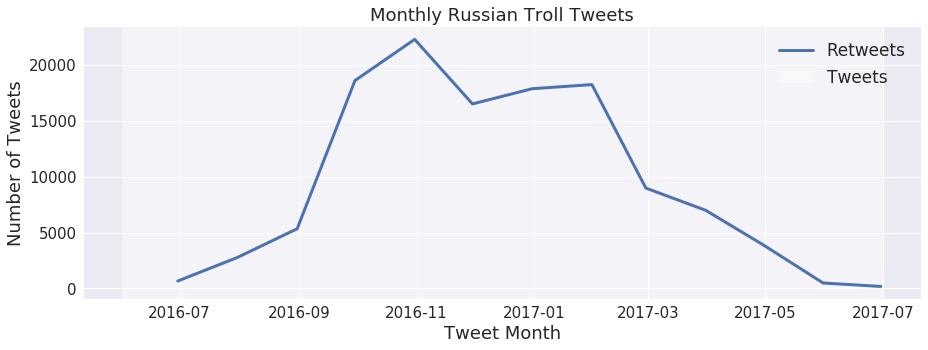

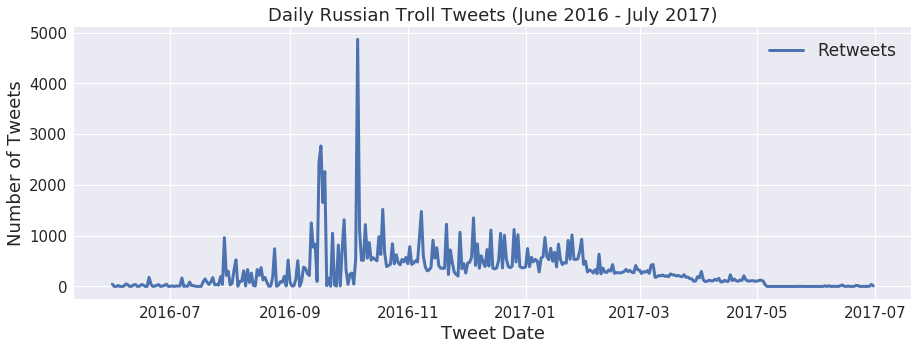

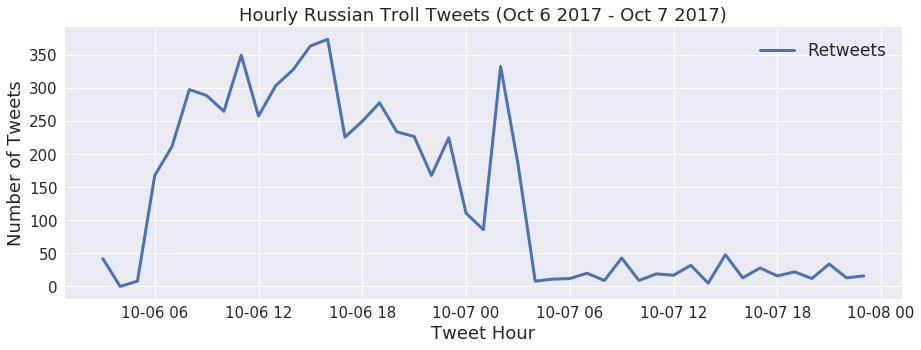

In [10]:
retweets = generate_time_window_counts(busiest_tweets)

plt.figure(figsize=(15,5))
plt.plot(retweets[0])
plt.axvspan(busiest_window_start, busiest_window_end, facecolor='white', alpha=0.5)
plt.xlabel('Tweet Month')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Monthly Russian Troll Tweets')

plt.figure(figsize=(15,5))
plt.plot(retweets[1])
#plt.axvspan(hourly_window_start, hourly_window_end, facecolor='red', alpha=0.5)
plt.xlabel('Tweet Date')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Daily Russian Troll Tweets (June 2016 - July 2017)');

plt.figure(figsize=(15,5))
plt.plot(retweets[2])
plt.xlabel('Tweet Hour')
plt.ylabel('Number of Tweets')
plt.legend(['Retweets', 'Tweets'])
plt.title('Hourly Russian Troll Tweets (Oct 6 2017 - Oct 7 2017)');

# LDA Analysis #
** I generated LDA probabilities for 15 topics over 150 passes, here's where I'm going to look at the tweets over time **

In [11]:
lda = pickle.load(open( "../pickled_models/lda_15_150passes.p", "rb" ) )
lda_rt = pickle.load(open( "../pickled_models/lda_rt_15_150passes.p", "rb" ) )

In [12]:
topics = lda.show_topics(num_topics=15, formatted=False)
# sort so that the topics align with list indexing
topics.sort(key=lambda x:x[0])
# strip the topic index and use as a list
topics = [topic[1] for topic in topics]

topics

[[('want', 0.03328587),
  ('know', 0.02930693),
  ('all', 0.020337842),
  ('way', 0.01631085),
  ('not', 0.015098149),
  ('blacklivesmatter', 0.014142227),
  ('care', 0.013291504),
  ('realdonaldtrump', 0.012866249),
  ('well', 0.012136722),
  ('like', 0.008499883)],
 [('tcot', 0.05052313),
  ('pjnet', 0.03564416),
  ('ccot', 0.024533892),
  ('like', 0.017275184),
  ('wakeupamerica', 0.0167852),
  ('convention', 0.016047457),
  ('teapartynews', 0.015880845),
  ('politics', 0.015101429),
  ('gop', 0.014646862),
  ('usa', 0.01387534)],
 [('people', 0.083406515),
  ('black', 0.03362964),
  ('not', 0.015948636),
  ('think', 0.014991015),
  ('need', 0.014297256),
  ('white', 0.009778064),
  ('say', 0.009354816),
  ('racist', 0.009236528),
  ('real', 0.008657273),
  ('lives', 0.008569963)],
 [('hate', 0.021338684),
  ('love', 0.016854702),
  ('thingspeopleontwitterlike', 0.013186268),
  ('not', 0.011935465),
  ('true', 0.010893503),
  ('thingsmoretrustedthanhillary', 0.010859779),
  ('game',

In [13]:
rt_topics = lda_rt.show_topics(num_topics=15, formatted=False)
# sort so that the topics align with list indexing
rt_topics.sort(key=lambda x:x[0])
# strip the topic index and use as a list
rt_topics = [topic[1] for topic in rt_topics]
rt_topics

[[('get', 0.008957775),
  ('world', 0.007886486),
  ('need', 0.0070077893),
  ('something', 0.0062038116),
  ('truth', 0.0061863046),
  ('things', 0.006183421),
  ('let', 0.005989379),
  ('could', 0.0059386604),
  ('idrunforpresidentif', 0.0056342375),
  ('people', 0.005633185)],
 [('black', 0.024363667),
  ('blicqer', 0.02114729),
  ('realdonaldtrump', 0.020455128),
  ('white', 0.010452024),
  ('man', 0.009566942),
  ('people', 0.008386594),
  ('police', 0.0067446227),
  ('anti', 0.0055249385),
  ('zaibatsunews', 0.0053305896),
  ('poll', 0.0051865713)],
 [('love', 0.014589747),
  ('god', 0.013620628),
  ('all', 0.0133013595),
  ('go', 0.0077999765),
  ('one', 0.007798402),
  ('thank', 0.007558421),
  ('thanks', 0.007278113),
  ('get', 0.007054869),
  ('time', 0.006990383),
  ('day', 0.006458297)],
 [('tcot', 0.046375364),
  ('pjnet', 0.031092554),
  ('ccot', 0.017737314),
  ('mt', 0.012639503),
  ('gt', 0.012133861),
  ('wakeupamerica', 0.01206963),
  ('cruz', 0.011408325),
  ('2a', 

In [14]:
# 10 = gun tweets 
lda_df = pd.read_csv('../csvs/km_lda_15_150passes.csv', index_col='id')
lda_df['created_datetime'] = pd.to_datetime(lda_df['created_datetime'])
lda_df.reset_index(inplace=True)
lda_df.set_index('created_datetime',drop=False, inplace=True)
lda_df[['user_key', 'text', 'lda_topic_0', 'lda_topic_1']].sample(5)

,user_key,text,lda_topic_0,lda_topic_1
created_datetime,,,,
2016-09-20 18:43:03,pamela_moore13,#FloridaIn5Words: Trump now LEADS in FLORIDA 🌴🌞🇺🇸\nCNN POLL: Trump now LEADS in Ohio and FLORIDA \nhttps://t.co/9iH2JtdVw0,0.000000,0.000000
2016-08-03 03:31:18,lukas_rosler,"Schlaue #Clinton hat einer Frau gezahlt,damit sie ein #Baby kriegt und das zu #Trump-Rede mitbringt, wo es schreit!😂 https://t.co/SyZ1FHLpEt",0.000000,0.147619
2016-10-24 04:29:50,screamymonkey,British lawmakers ask Obama to let hacking suspect face trial in UK #world #news,0.000000,0.000000
2016-08-14 12:39:04,politweecs,New State Department emails reveal #HillaryClinton slept past staff efforts to set up intelligence briefing https://t.co/GGNXUGuVzP,0.000000,0.000000
2016-11-10 12:31:06,thefoundingson,@joeallenii 👍🏻,0.066667,0.066667


In [15]:
lda_column_names = ['lda_topic_{}'.format(i) for i in range(0,15)]
lda_topic_tweet_counts = []
total_topic_tweets = []
largest_tweet_spike = []
for lda_column_name in lda_column_names:
    tweets_to_look_at = lda_df[lda_df[lda_column_name] >= .80]
    total_topic_tweets.append(tweets_to_look_at.shape[0])
    lda_tweets = generate_time_window_counts(tweets_to_look_at)
    lda_topic_tweet_counts.append(lda_tweets)
    
monthly_tweets = [lda_topic_count[0] for lda_topic_count in lda_topic_tweet_counts]
largest_tweet_spike = [monthly_tweet.values.max() for monthly_tweet in monthly_tweets]
indices_of_top_spikes = np.argpartition(largest_tweet_spike, -3)[-3:]
top_spike_colors = ['blue', 'green', 'grey']

In [16]:
trump_pudding_start = '2016-10-7'
trump_pudding_end = '2016-10-8'

belgian_bombings_start = '2016-3-22'
belgian_bombings_end = '2016-3-23'

dnc_start = '2016-7-25'
dnc_end = '2016-7-28'

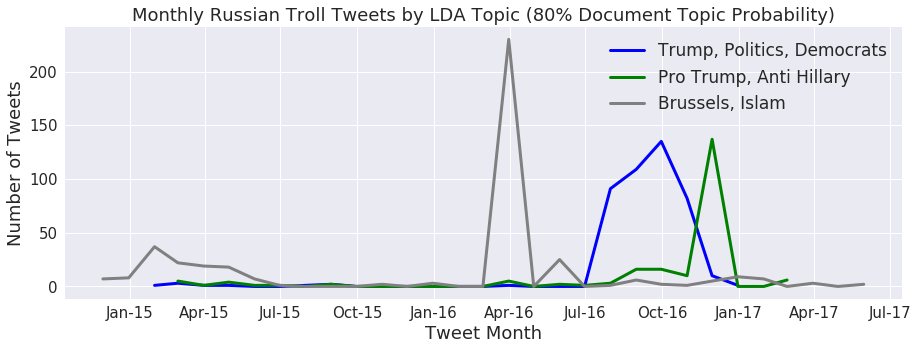

In [28]:
fig = plt.figure(figsize=(15,5), facecolor='white')
for idx, spike_index in enumerate(indices_of_top_spikes):
    plt.plot(monthly_tweets[spike_index], color=top_spike_colors[idx])

#plt.axvspan(election_day_start, election_day_end, facecolor='red', alpha=1)
#plt.axvspan(trump_pudding_start, trump_pudding_end, facecolor='red', alpha=1)
#plt.axvspan(belgian_bombings_start, belgian_bombings_end, facecolor='red', alpha=1)
#plt.axvspan(dnc_start, dnc_end, facecolor='red', alpha=1)
fig.axes[0].xaxis.set_major_formatter(myFmt)

plt.xlabel('Tweet Month')
plt.ylabel('Number of Tweets')
word_mappings = {6: 'Trump, Politics, Democrats', 9: 'Pro Trump, Anti Hillary', 12: 'Brussels, Islam'}
plt.legend([word_mappings[x] for x in indices_of_top_spikes])
plt.title('Monthly Russian Troll Tweets by LDA Topic (80% Document Topic Probability)');

In [18]:

for index in indices_of_top_spikes:
    words = []
    weights = []
    for topic_tuple in topics[index]:
        words.append(topic_tuple[0])
        weights.append(topic_tuple[1])
    
    #print(indices_of_top_spikes)
    print (words)
    #print(topics[index])
    #plt.figure(figsize=(15,5))
    #plt.barh(words, weights)
    #plt.ylabel('Word')
    #plt.xlabel('Word Weight')
    #plt.title('LDA Topic {}'.format(index))

['realdonaldtrump', 'politics', 'hillaryclinton', 'says', 'campaign', 'news', 'debate', 'gop', 'bill', 'dnc']
['realdonaldtrump', 'trumpforpresident', 'hillaryclinton', 'vote', 'trump2016', 'maga', 'hillaryforprison2016', 'today', 'makeamericagreatagain', 'trumppence16']
['islamkills', 'love', 'go', 'refugees', 'let', 'not', 'all', 'every', 'things', 'brussels']


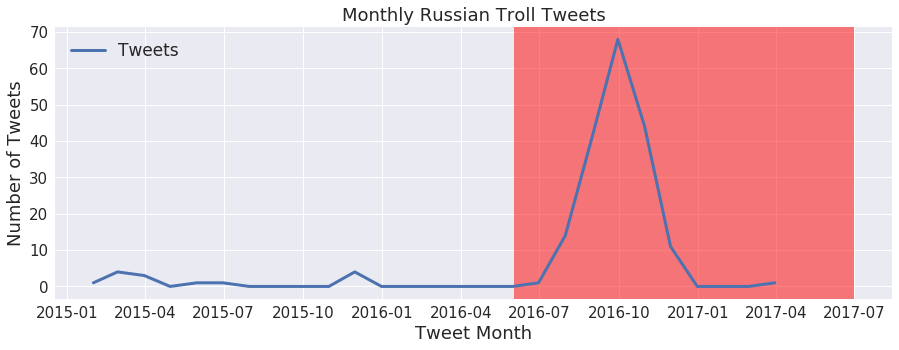

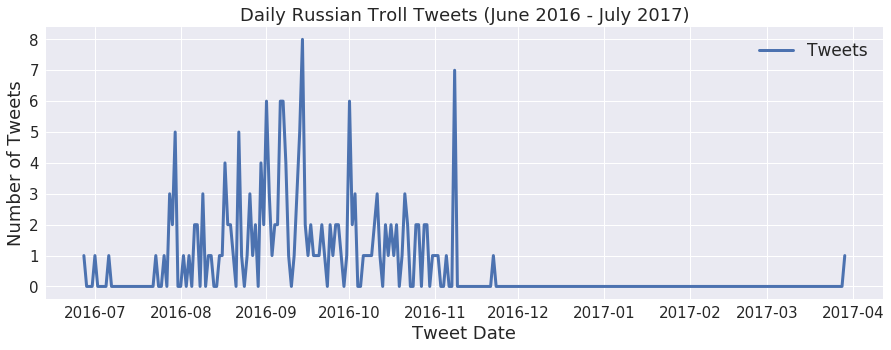

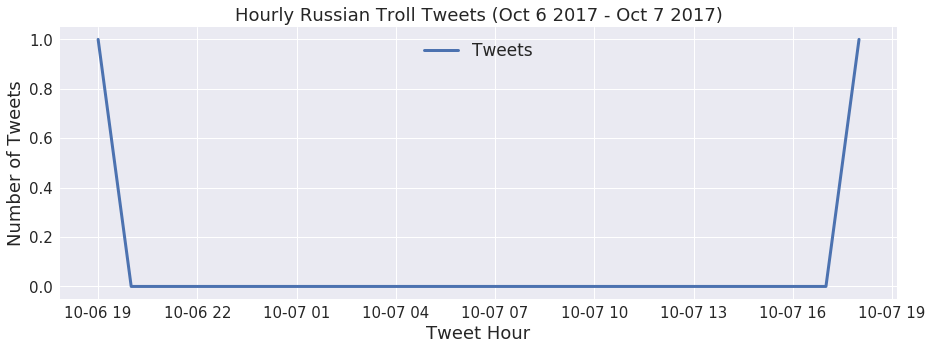

In [19]:

lda_topic = 'lda_topic_14'
tweets_to_look_at = lda_df[lda_df[lda_topic] >= .80]
lda_tweets = generate_time_window_counts(tweets_to_look_at)

#fig, ax = plt.subplots(nrows=3, ncols=1)
#fig.figsize=(15,5)
plt.figure(figsize=(15,5))
plt.plot(lda_tweets[0])
plt.axvspan(busiest_window_start, busiest_window_end, facecolor='red', alpha=0.5)
plt.xlabel('Tweet Month')
plt.ylabel('Number of Tweets')
plt.legend(['Tweets'])
plt.title('Monthly Russian Troll Tweets')

plt.figure(figsize=(15,5))
plt.plot(lda_tweets[1])
#plt.axvspan(hourly_window_start, hourly_window_end, facecolor='red', alpha=0.5)
plt.xlabel('Tweet Date')
plt.ylabel('Number of Tweets')
plt.legend(['Tweets'])
plt.title('Daily Russian Troll Tweets (June 2016 - July 2017)');

plt.figure(figsize=(15,5))
plt.plot(lda_tweets[2])
plt.xlabel('Tweet Hour')
plt.ylabel('Number of Tweets')
plt.legend(['Tweets'])
plt.title('Hourly Russian Troll Tweets (Oct 6 2017 - Oct 7 2017)');

In [20]:
columns_to_view = ['user_key', 'text']

# Tweets to include in presentation #

In [ ]:
# need the fresh df since the 'cleaned' df datasource doesn't seem to have the @midnight tweets
midnight_merkel = pd.read_csv('../tweets.csv', dtype={'tweet_id': np.object})
midnight_merkel = midnight_merkel[~midnight_merkel['text'].isnull()]
midnight_merkel['created_datetime'] = pd.to_datetime(midnight_merkel['created_str'])
midnight_merkel.set_index('created_datetime', inplace=True)
midnight_merkel[midnight_merkel['text'].str.contains('@midnight', flags=re.IGNORECASE)][columns_to_view].head(5)


In [ ]:
midnight_merkel[midnight_merkel['text'].str.contains('#merkelmussbleiben', flags=re.IGNORECASE)][columns_to_view].head(5)